In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Transformed_Housing_Data2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
data['Mean_Sales'] = data['Sale_Price'].mean()
data['Mean_Sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: Mean_Sales, dtype: float64

In [5]:
import matplotlib.pyplot as plt

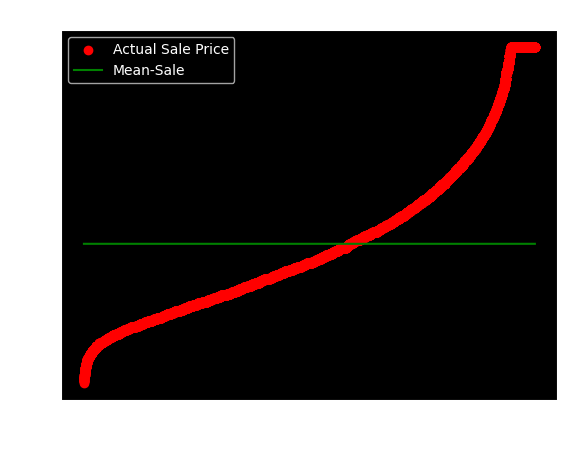

In [6]:
plt.figure(dpi = 100)
k = range(0, len(data))
plt.style.use("dark_background")
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt.plot(k, data['Mean_Sales'].sort_values(), color = 'green', label = 'Mean-Sale')

plt.xlabel("Fitted Points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Sale Price")
plt.legend()

In [7]:
import numpy as np

In [8]:
grades_mean = data.pivot_table(values = 'Sale_Price',columns = 'Overall Grade',aggfunc = np.mean)
grades_mean

C:\Users\theso\AppData\Local\Temp\ipykernel_12300\2027180693.py:1: FutureWarning: The provided callable <function mean at 0x0000020E1B88F060> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grades_mean = data.pivot_table(values = 'Sale_Price',columns = 'Overall Grade',aggfunc = np.mean)


Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [9]:
#making new column
data['grade_mean'] = 0

#for every grade fill its mean price in new column
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade']==i] = grades_mean[i][0]

data['grade_mean'].head()

C:\Users\theso\AppData\Local\Temp\ipykernel_12300\1327547267.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['grade_mean'][data['Overall Grade']==i] = grades_mean[i][0]
C:\Users\theso\AppData\Local\Temp\ipykernel_12300\1327547267.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [10]:
gradewise_list = []
for i in range(1,11):
    k=data['Sale_Price'][data["Overall Grade"] == i]
    gradewise_list.append(k)


In [11]:
classwise_list = []
for i in range(1,11):
    k=data['Sale_Price'][data["Overall Grade"] == i]
    classwise_list.append(k)


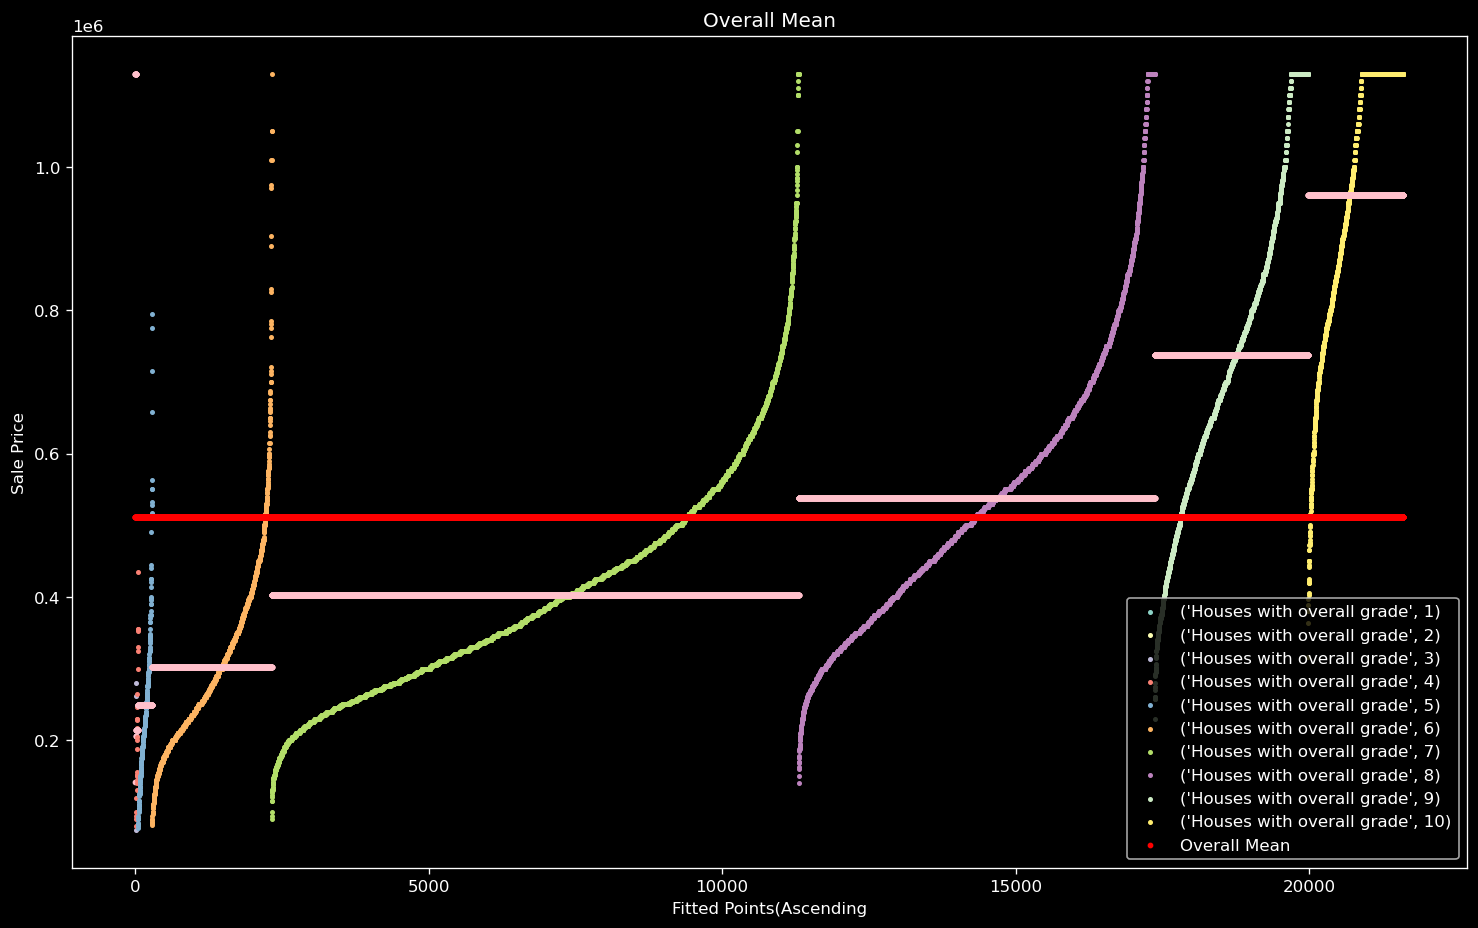

In [26]:
plt.figure(dpi = 120, figsize = (15,9))


####Plotting sale price gradewise####
#z variable is for x axis
z=0
for i in range (1,11):
    #defining x axis using z
    points = [k for k in range (z, z+ len(classwise_list[i-1]))]
    #plotting
    plt.scatter( points,
               classwise_list[i-1].sort_values(),
               label = ('Houses with overall grade', i), s=4)
    #plotting gradewise mean
    plt.scatter(points,
               [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
               s=6, color = 'pink')
    z = max(points) + 1

###plotting overall mean
plt.scatter([q for q in range(0,z)],
           data['Mean_Sales'],
            color = 'red',
            label = 'Overall Mean',
            s = 6)
plt.xlabel('Fitted Points(Ascending')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend(loc = 4)

In [28]:
mean_difference = data['Mean_Sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

Text(0.5, 1.0, 'Residuals with Respect to Gradewise Mean')

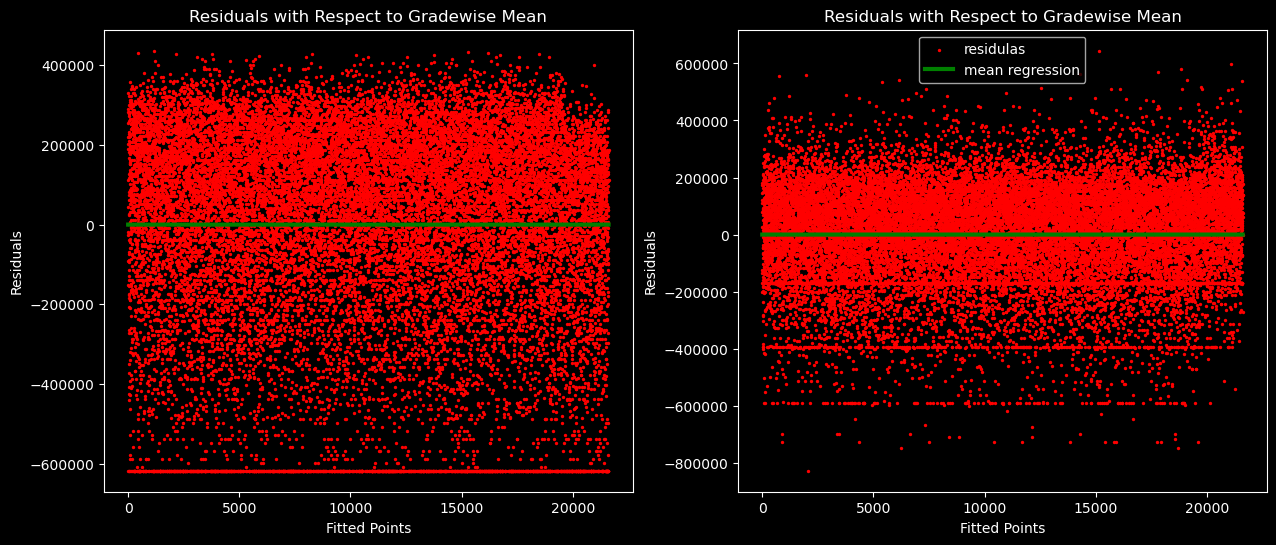

In [32]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure(figsize = (15,6), dpi = 100)

plt.subplot(1,2,1)

plt.scatter(k,mean_difference,color = 'red', label = 'residulas', s = 2)
plt.plot(k, l, color = 'green', label = 'mean regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residuals with Respect to Gradewise Mean')

plt.subplot(1,2,2)

plt.scatter(k,grade_mean_difference,color = 'red', label = 'residulas', s = 2)
plt.plot(k, l, color = 'green', label = 'mean regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals with Respect to Gradewise Mean')
